#        PROJECT TITLE:

# Analysis on UK Food Hygiene Rating Data (London):
Food Hygiene Rating of Business in Boroughs of London in United Kingdom

# Agenda
 
1. Intoduction[Project Definition]
2. Data Investigation & Cleaning
3. Data Visualization
4. Insights
5. Conclusion

1. Introduction 

# About Dataset

The data provides the food hygiene rating or inspection result given to a business and reflects the standards of food hygiene found on the date of inspection or visit by the local authority. Businesses include restaurants, pubs, cafés, takeaways, hotels and other places consumers eat, as well as in supermarkets and other food shop.

Food Hygiene Agency inspect business to protect consumers and ensure food safety and hygiene is a priority for food businesses. -Dataset including Boroughs of London inspection and rating information


# About this file

In this Notebook we extracted datasets from multiple XML sources. -Food Hygiene Agency inspect business to protect consumers and ensure food safety and hygiene is a priority for food businesses. -Dataset includings Boroughs of London inspection and rating informations.

Food Hygiene Rating Scheme

5 – Hygiene standards are very good

4 – Hygiene standards are good

3 – Hygiene standards are generally satisfactory

2 – Some improvement is necessary

1 – Major improvement is necessary

0 – Urgent improvement is required

# 2. Data Investigation & Cleaning

For every given dataset, the most important elements are the columns containing numbers{Values}. So for this our datasets, the main candidates for creating our different reports are​

    -Rating Values                   -LocalAuthoritycode​
            While others are just description
            
The Food Hygiene Rating DataSet mainly contains 12 columns;
Index(['FHRSID', 'LocalAuthorityBusinessID', 'BusinessName', 'BusinessType',
       'PostCode', 'RatingValue', 'RatingKey', 'RatingDate',
       'LocalAuthorityCode', 'LocalAuthorityName', 'Longitude', 'Latitude'],
      dtype='object') 
but after loading/importing it into jupyter notebook, an 'Unnamed_0' column appears which stands like a serial number column. So by <pd.read_csv("food_hygiene_rating_data.csv", index_col = 0)> removes the 'Unnamed_0' column, thereby retaining its initial number of columns

# 3. Data Visualization



3.1 Importing useful Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

3.2 Loading the Dataset

In [2]:
dataset = pd.read_csv('food_hygiene_rating_data.csv') #, index_col=0)

In [3]:
dataset.head()

,FHRS_ID,Local Authority Business_ID,Business Name,Business Type,PostCode,Rating Value,Rating Key,Rating Date,Local Authority Code,Local Authority Name,Longitude,Latitude
0,1438654,21/00856/FOOD,1st Base Catering,Mobile caterer,E20 2ST,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,525,Newham,-0.018066,51.538799
1,1132140,19/00459/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E16 2RD,5,fhrs_5_en-GB,5/10/2019,525,Newham,0.064757,51.507405
2,1132134,19/00447/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E15 4LZ,5,fhrs_5_en-GB,5/14/2019,525,Newham,0.009809,51.543395
3,1260384,20/00288/FOOD,55 Square Limited,Restaurant/Cafe/Canteen,E16 1EN,2,fhrs_2_en-GB,12/9/2020,525,Newham,0.012417,51.517514
4,1389145,21/00354/FOOD,7 Mamas Ltd,Takeaway/sandwich shop,E6 3HN,5,fhrs_5_en-GB,1/5/2022,525,Newham,0.055372,51.527803


In [4]:
dataset = pd.read_csv('food_hygiene_rating_data.csv') #, index_col=0

index_col = 0 wiil take column 0 to an index

In [5]:
dataset.head()

,FHRS_ID,Local Authority Business_ID,Business Name,Business Type,PostCode,Rating Value,Rating Key,Rating Date,Local Authority Code,Local Authority Name,Longitude,Latitude
0,1438654,21/00856/FOOD,1st Base Catering,Mobile caterer,E20 2ST,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,525,Newham,-0.018066,51.538799
1,1132140,19/00459/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E16 2RD,5,fhrs_5_en-GB,5/10/2019,525,Newham,0.064757,51.507405
2,1132134,19/00447/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E15 4LZ,5,fhrs_5_en-GB,5/14/2019,525,Newham,0.009809,51.543395
3,1260384,20/00288/FOOD,55 Square Limited,Restaurant/Cafe/Canteen,E16 1EN,2,fhrs_2_en-GB,12/9/2020,525,Newham,0.012417,51.517514
4,1389145,21/00354/FOOD,7 Mamas Ltd,Takeaway/sandwich shop,E6 3HN,5,fhrs_5_en-GB,1/5/2022,525,Newham,0.055372,51.527803


In [6]:
dataset.columns

Index(['FHRS_ID', 'Local Authority Business_ID', 'Business Name',
       'Business Type', 'PostCode', 'Rating Value', 'Rating Key',
       'Rating Date', 'Local Authority Code', 'Local Authority Name',
       'Longitude', 'Latitude'],
      dtype='object')

In [7]:
len(dataset)

24352

In [8]:
print(type('Rating Value'))

<class 'str'>


In [9]:
print(type(5))

<class 'int'>


3.3 DataSet Splitting

From Data Investigation & cleaning it was said that  'For every given dataset, the most important elements are the columns containing numbers{Values}. So for this our datasets, the main candidates for creating our different reports are​

    -Rating Values                   -LocalAuthoritycode​
            While others are just description'
   
so since our Rating Value comtains both Rated & Not_rated values we need to split into their different types

    3.3.1 Not_rated values

In [10]:
not_rated = ['AwaitingInspection','AwaitingPublication','Exempt']
dataset_not_rated = dataset[dataset['Rating Value'].isin(not_rated)]

In [11]:
dataset_not_rated.head()

,FHRS_ID,Local Authority Business_ID,Business Name,Business Type,PostCode,Rating Value,Rating Key,Rating Date,Local Authority Code,Local Authority Name,Longitude,Latitude
0,1438654,21/00856/FOOD,1st Base Catering,Mobile caterer,E20 2ST,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,525,Newham,-0.018066,51.538799
22,1471237,22/00628/FOOD,Ackeee Tree - HAF Project,Other catering premises,E7 8LE,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,525,Newham,0.032353,51.539895
23,1471238,22/00629/FOOD,Ackeee Tree Childrens Club - HAF Project,Other catering premises,E7 8JT,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,525,Newham,0.032430,51.541611
27,1006732,17/00416/FOOD,Agas Foods Ltd,Manufacturers/packers,E13 0QZ,Exempt,fhrs_exempt_en-GB,9/13/2017,525,Newham,0.031067,51.537643
29,1414858,21/00653/FOOD,Aguia D Ouro,Retailers - other,E16 1FD,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,525,Newham,0.021563,51.508239


In [12]:
ai = (dataset_not_rated['Business Type'].where(dataset_not_rated[('Rating Value')] == 'AwaitingInspection'))
a = ai.count()
a

2439

In [13]:
emt = (dataset_not_rated['Business Type'].where(dataset_not_rated[('Rating Value')] == 'Exempt'))
s = emt.count()
s

1070

In [14]:
ap = (dataset_not_rated['Business Type'].where(dataset_not_rated[('Rating Value')] == 'AwaitingPublication'))
d = ap.count()
d

1

In [15]:
#l = a + s + d
#l

In [16]:
print(f'Shape of the dataset: {dataset_not_rated.shape}')
print(f'There are {dataset_not_rated.shape[0]} rows in the "Not_rated" data.')

Shape of the dataset: (3510, 12)
There are 3510 rows in the "Not_rated" data.


    3.3.2 Rated values

In [17]:
rated = ['0', '1', '2', '3', '4', '5']
dataset_rated = dataset[dataset['Rating Value'].isin(rated)]

In [18]:
dataset_rated.head(10)

,FHRS_ID,Local Authority Business_ID,Business Name,Business Type,PostCode,Rating Value,Rating Key,Rating Date,Local Authority Code,Local Authority Name,Longitude,Latitude
1,1132140,19/00459/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E16 2RD,5,fhrs_5_en-GB,5/10/2019,525,Newham,0.064757,51.507405
2,1132134,19/00447/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E15 4LZ,5,fhrs_5_en-GB,5/14/2019,525,Newham,0.009809,51.543395
3,1260384,20/00288/FOOD,55 Square Limited,Restaurant/Cafe/Canteen,E16 1EN,2,fhrs_2_en-GB,12/9/2020,525,Newham,0.012417,51.517514
4,1389145,21/00354/FOOD,7 Mamas Ltd,Takeaway/sandwich shop,E6 3HN,5,fhrs_5_en-GB,1/5/2022,525,Newham,0.055372,51.527803
5,680560,13/00452/COMM,7 Till 11 Uk Ltd,Retailers - other,E7 9BY,4,fhrs_4_en-GB,9/13/2019,525,Newham,0.017781,51.550156
6,849344,74760/0518/0/000,777 Shops,Retailers - other,E7 8AF,1,fhrs_1_en-GB,2/27/2020,525,Newham,0.039902,51.548127
7,1031405,18/00068/FOOD,786HYE Limited,Retailers - other,E12 6HN,3,fhrs_3_en-GB,3/6/2018,525,Newham,0.061288,51.549292
8,1366503,21/00173/FOOD,8 Slices Pizzeria,Restaurant/Cafe/Canteen,E16 1AT,5,fhrs_5_en-GB,6/23/2021,525,Newham,0.021100,51.507554
9,992959,17/00428/FOOD,A Cafe & Cream Corner,Restaurant/Cafe/Canteen,E12 6RH,4,fhrs_4_en-GB,11/9/2017,525,Newham,0.049225,51.545979
10,864146,78550/0026/0/000,A D S News,Retailers - other,E6 1NQ,5,fhrs_5_en-GB,10/12/2018,525,Newham,0.049725,51.534656


In [19]:
five = (dataset_rated['Business Type'].where(dataset_rated[str('Rating Value')] == '5'))
q = five.count()
q

12544

In [20]:
four = (dataset_rated['Business Type'].where(dataset_rated[str('Rating Value')] == '4'))
w = four.count()
w

4483

In [21]:
three = (dataset_rated['Business Type'].where(dataset_rated[str('Rating Value')] == '3'))
e = three.count()
e

2450

In [22]:
two = (dataset_rated['Business Type'].where(dataset_rated[str('Rating Value')] == '2'))
r = two.count()
r

675

In [23]:
one = (dataset_rated['Business Type'].where(dataset_rated[str('Rating Value')] == '1'))
t = one.count()
t

550

In [24]:
zero = (dataset_rated['Business Type'].where(dataset_rated[str('Rating Value')] == '0'))
y = zero.count()
y

140

In [25]:
#k = q + w + e + r + t + y
#k

In [26]:
#l + k

In [27]:
print(f'Shape of the data: {dataset_rated.shape}')
print(f'There are {dataset_rated.shape[0]} rows in the "Rated" data.')

Shape of the data: (20842, 12)
There are 20842 rows in the "Rated" data.


3.4 Data Wrangling [cleaning & Transformation]

    3.4.1 Data Cleaning

In [28]:
dataset.head()

,FHRS_ID,Local Authority Business_ID,Business Name,Business Type,PostCode,Rating Value,Rating Key,Rating Date,Local Authority Code,Local Authority Name,Longitude,Latitude
0,1438654,21/00856/FOOD,1st Base Catering,Mobile caterer,E20 2ST,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,525,Newham,-0.018066,51.538799
1,1132140,19/00459/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E16 2RD,5,fhrs_5_en-GB,5/10/2019,525,Newham,0.064757,51.507405
2,1132134,19/00447/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E15 4LZ,5,fhrs_5_en-GB,5/14/2019,525,Newham,0.009809,51.543395
3,1260384,20/00288/FOOD,55 Square Limited,Restaurant/Cafe/Canteen,E16 1EN,2,fhrs_2_en-GB,12/9/2020,525,Newham,0.012417,51.517514
4,1389145,21/00354/FOOD,7 Mamas Ltd,Takeaway/sandwich shop,E6 3HN,5,fhrs_5_en-GB,1/5/2022,525,Newham,0.055372,51.527803


In [29]:
dataset['Rating Value'].describe()

count     24352
unique        9
top           5
freq      12544
Name: Rating Value, dtype: object

In [30]:
dataset.describe()

,FHRS_ID,Local Authority Code,Longitude,Latitude
count,2.435200e+04,24352.000000,24352.000000,24352.000000
mean,9.078713e+05,516.565662,-0.101340,51.528516
std,3.808622e+05,9.214929,0.146662,0.052086
min,5.930000e+02,501.000000,-3.422592,50.695622
25%,5.152438e+05,509.000000,-0.140140,51.503144
50%,1.000268e+06,514.000000,-0.088583,51.534371
75%,1.263384e+06,526.000000,-0.013117,51.559136
max,1.486251e+06,533.000000,0.524309,53.741785


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24352 entries, 0 to 24351
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FHRS_ID                      24352 non-null  int64  
 1   Local Authority Business_ID  24352 non-null  object 
 2   Business Name                24351 non-null  object 
 3   Business Type                24352 non-null  object 
 4   PostCode                     24352 non-null  object 
 5   Rating Value                 24352 non-null  object 
 6   Rating Key                   24352 non-null  object 
 7   Rating Date                  21901 non-null  object 
 8   Local Authority Code         24352 non-null  int64  
 9   Local Authority Name         24352 non-null  object 
 10  Longitude                    24352 non-null  float64
 11  Latitude                     24352 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 2.2+ MB


In [32]:
dataset_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20842 entries, 1 to 24351
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FHRS_ID                      20842 non-null  int64  
 1   Local Authority Business_ID  20842 non-null  object 
 2   Business Name                20842 non-null  object 
 3   Business Type                20842 non-null  object 
 4   PostCode                     20842 non-null  object 
 5   Rating Value                 20842 non-null  object 
 6   Rating Key                   20842 non-null  object 
 7   Rating Date                  20842 non-null  object 
 8   Local Authority Code         20842 non-null  int64  
 9   Local Authority Name         20842 non-null  object 
 10  Longitude                    20842 non-null  float64
 11  Latitude                     20842 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 2.1+ MB


In [33]:
dataset_not_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3510 entries, 0 to 24338
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FHRS_ID                      3510 non-null   int64  
 1   Local Authority Business_ID  3510 non-null   object 
 2   Business Name                3509 non-null   object 
 3   Business Type                3510 non-null   object 
 4   PostCode                     3510 non-null   object 
 5   Rating Value                 3510 non-null   object 
 6   Rating Key                   3510 non-null   object 
 7   Rating Date                  1059 non-null   object 
 8   Local Authority Code         3510 non-null   int64  
 9   Local Authority Name         3510 non-null   object 
 10  Longitude                    3510 non-null   float64
 11  Latitude                     3510 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 356.5+ KB


Rated and Not_rated dataset will have the same number of columns as original 'dataset' since they're extracted from it

In [34]:
dataset_rated.isnull().sum()

FHRS_ID                        0
Local Authority Business_ID    0
Business Name                  0
Business Type                  0
PostCode                       0
Rating Value                   0
Rating Key                     0
Rating Date                    0
Local Authority Code           0
Local Authority Name           0
Longitude                      0
Latitude                       0
dtype: int64

    There isn't any missing data in this DataFrame

In [35]:
dataset_not_rated.isnull().sum()

FHRS_ID                           0
Local Authority Business_ID       0
Business Name                     1
Business Type                     0
PostCode                          0
Rating Value                      0
Rating Key                        0
Rating Date                    2451
Local Authority Code              0
Local Authority Name              0
Longitude                         0
Latitude                          0
dtype: int64

The 'Business Type' has a NaN[missing] value and Rating Date contains alot of missing value. Although we aren't really bordered about the Not_rated dataset.

In [36]:
# fig, axarr = plt.subplots(2, 2, figsize=(17,12), dpi=80, facecolor='w', edgecolor='k')
# sns.set(style="white")
# sns.countplot(x='Age', hue = 'Class',dataset = data_rated, ax=axarr[0][0], palette="Accent_r")
# axarr[0][0].set_title('Distribution of Age')
# fig.suptitle('Frequency Distribution of Different Categorical Variable', fontsize=16);


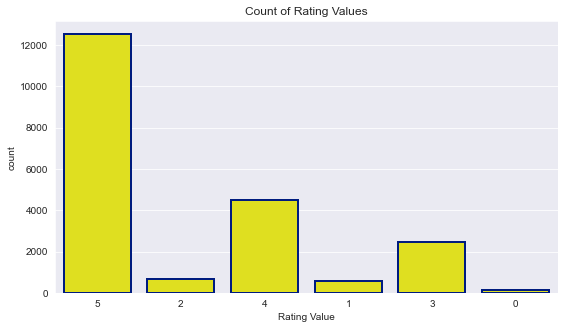

In [99]:
fig, ax = plt.subplots(figsize=(9, 5))
ax = sns.countplot(x = 'Rating Value', data = dataset_rated, color = 'yellow', linewidth = 2, edgecolor = sns.color_palette('dark', 1)).set_title('Count of Rating Values')

###   . The illustrative Bar graph above shows that most of the food businesses has a rating value of '5' [Hygiene standards are very good] 

# 4. Insights

Rating value "5" has noticeably more business name.

"fhrs_5_en_GB" accounts for the majority of food_hygiene_rating_data.

There is a linear correlation between food_hygiene_rating_data and Post code.

'fhrs_5_en_GB' accounts for the majority of food_hygiene_rating_data  for Business Type 'Restaurant/Cafe/Canteen'.

'Restaurant/Cafe/Canteen' and 'Retailers -other' have noticeably more Business Name for Rating Key 'fhrs_4_en-GB'.

Rating value '5' accounts for the majority of food_hygiene_rating_data for Business Type 'Restaurant/Cafe/Canteen'.

Rating value '5' has noticeably more Business Name for Local Authority Code '506'.

'fhrs_5_en-GB' has noticeably more Business Name for Local Authority Name 'Camden'.

​

# 5. Conclusion

There is an increase [linear] in number of Business type having low ratings.

Hospital/Children/Caring premises needs more inspection because they mostly have a low rating value.

Governments needs to lockdown 'other catering premises' for a certain period of time because of their low rating value.

Finally, governments through Local authority needs to inspect thoroughly  businesses with awaiting inspection rating value and others below rating value of 2.